In [ ]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import numpy as np
import random as rnd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Mahalanobis distance calculation

In [ ]:
# Mahalanobis distance calculation method
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:
df_full = pd.read_csv('/content/drive/My Drive/Student/VFU/BioMed/Fuzzy clustyering Haralick features/Haralick_Features_QuPath_measurements.tsv',
                      sep='\t',
                      header=0)
df_full.head() #preview data

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,ROI: 0.50 µm per pixel: OD Sum: Mean,ROI: 0.50 µm per pixel: OD Sum: Std.dev.,ROI: 0.50 µm per pixel: OD Sum: Median,ROI: 0.50 µm per pixel: OD Sum: Haralick Angular second moment (F0),ROI: 0.50 µm per pixel: OD Sum: Haralick Contrast (F1),ROI: 0.50 µm per pixel: OD Sum: Haralick Correlation (F2),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum of squares (F3),ROI: 0.50 µm per pixel: OD Sum: Haralick Inverse difference moment (F4),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum average (F5),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum variance (F6),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum entropy (F7),ROI: 0.50 µm per pixel: OD Sum: Haralick Entropy (F8),ROI: 0.50 µm per pixel: OD Sum: Haralick Difference variance (F9),ROI: 0.50 µm per pixel: OD Sum: Haralick Difference entropy (F10),ROI: 0.50 µm per pixel: OD Sum: Haralick Information measure of correlation 1 (F11),ROI: 0.50 µm per pixel: OD Sum: Haralick Information measure of correlation 2 (F12),ROI: 0.50 µm per pixel: Saturation: Mean,ROI: 0.50 µm per pixel: Saturation: Std.dev.,ROI: 0.50 µm per pixel: Saturation: Median,ROI: 0.50 µm per pixel: Saturation: Haralick Angular second moment (F0),ROI: 0.50 µm per pixel: Saturation: Haralick Contrast (F1),ROI: 0.50 µm per pixel: Saturation: Haralick Correlation (F2),ROI: 0.50 µm per pixel: Saturation: Haralick Sum of squares (F3),ROI: 0.50 µm per pixel: Saturation: Haralick Inverse difference moment (F4),ROI: 0.50 µm per pixel: Saturation: Haralick Sum average (F5),ROI: 0.50 µm per pixel: Saturation: Haralick Sum variance (F6),ROI: 0.50 µm per pixel: Saturation: Haralick Sum entropy (F7),ROI: 0.50 µm per pixel: Saturation: Haralick Entropy (F8),ROI: 0.50 µm per pixel: Saturation: Haralick Difference variance (F9),ROI: 0.50 µm per pixel: Saturation: Haralick Difference entropy (F10),ROI: 0.50 µm per pixel: Saturation: Haralick Information measure of correlation 1 (F11),ROI: 0.50 µm per pixel: Saturation: Haralick Information measure of correlation 2 (F12),ROI: 0.50 µm per pixel: Brightness: Mean,...,Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Sum average (F5),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Sum variance (F6),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Sum entropy (F7),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Entropy (F8),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Difference variance (F9),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Difference entropy (F10),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Information measure of correlation 1 (F11),Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Haralick Information measure of correlation 2 (F12),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Mean,Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Std.dev.,Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Median,Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Angular second moment (F0),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Contrast (F1),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Correlation (F2),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum of squares (F3),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Inverse difference moment (F4),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum average (F5),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum variance (F6),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum entropy (F7),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Entropy (F8),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Difference variance (F9),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Difference entropy (F10),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturat

In [ ]:
df = df_full.drop(['Image', 'Name', 'Parent', 'Class','ROI', 'Centroid X µm','Centroid Y µm', 'ROI: 0.50 µm per pixel: OD Sum: Std.dev.',
                   'ROI: 0.50 µm per pixel: OD Sum: Median','ROI: 0.50 µm per pixel: OD Sum: Mean', 'ROI: 0.50 µm per pixel: Saturation: Mean',
       'ROI: 0.50 µm per pixel: Saturation: Std.dev.','ROI: 0.50 µm per pixel: Saturation: Median','ROI: 0.50 µm per pixel: Brightness: Mean',
       'ROI: 0.50 µm per pixel: Brightness: Std.dev.','ROI: 0.50 µm per pixel: Brightness: Median','Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Mean',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Std.dev.','Circle: Diameter 150.0 µm: 0.50 µm per pixel: OD Sum: Median',  'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Mean',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Std.dev.','Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Median', 
                   'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Mean','Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Std.dev.',
                   'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Median'], axis = 1) # drop unnecessary features
 df.columns #preview

In [ ]:
df.fillna(method='ffill', inplace=True) # fill the missing value with last valid observation forward

In [ ]:
# split the features into four groups
group1 = df.iloc[:,13:39] # group 1 ROI Brightness + Saturation
group2 = df.iloc[:,0:13] # group 2 ROI OD + Saturation
group3 = df.iloc[:28460,52::] # group 3 Circles on Brightness + Saturation # limit to 20 000 rows because of RAM, max is ca. 30000
group4 = df.iloc[:,39:65] # group 4 Circles on OD + Saturation

In [ ]:
group3.columns # in this experiment we work with group3

Index(['Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Angular second moment (F0)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Contrast (F1)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Correlation (F2)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum of squares (F3)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Inverse difference moment (F4)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum average (F5)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum variance (F6)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum entropy (F7)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Entropy (F8)',
       'Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Difference variance (F9)',
       'Circle: Diameter 150.0 

### without PCA

In [ ]:
# standardizing the data is not required because the Mahalanobis distance method does it anyway.
# If we standardize we get the same result. 
#scaler = StandardScaler()
#scaler.fit(group3)
#scaled_data = scaler.transform(group3)
#scaled_df = pd.DataFrame(scaled_data)

In [ ]:
# this block works with normalized features
#scaled_df['mahala'] = pd.Series(mahalanobis(x=scaled_df, data=scaled_df))
#scaled_df

# this block works with default features data
group3['mahala'] = pd.Series(mahalanobis(x=group3, data=group3))

# if the features of scaled_df are not correlated:
#   - then the covariance is not high
#   - the distance is more

In [ ]:
print(group3.iloc[:,-1].min()) # max Mahala dist
print(group3.iloc[:,-1].max()) # min Mahala dist
group3

2.3487451899699803
4670.917393403375


,Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Angular second moment (F0),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Contrast (F1),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Correlation (F2),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum of squares (F3),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Inverse difference moment (F4),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum average (F5),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum variance (F6),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Sum entropy (F7),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Entropy (F8),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Difference variance (F9),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Difference entropy (F10),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Information measure of correlation 1 (F11),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Saturation: Haralick Information measure of correlation 2 (F12),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Angular second moment (F0),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Contrast (F1),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Correlation (F2),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Sum of squares (F3),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Inverse difference moment (F4),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Sum average (F5),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Sum variance (F6),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Sum entropy (F7),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Entropy (F8),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Difference variance (F9),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Difference entropy (F10),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Information measure of correlation 1 (F11),Circle: Diameter 150.0 µm: 0.50 µm per pixel: Brightness: Haralick Information measure of correlation 2 (F12),mahala
0,0.0591,3.4622,0.6758,5.3394,0.5753,6.6677,17.7328,3.2288,4.8381,0.0024,1.9859,-0.0804,0.5525,0.0437,3.5973,0.7917,8.6354,0.5997,227.4486,30.9445,3.8059,5.3052,0.0025,1.9202,-0.1905,0.8091,788.944877
1,0.0587,2.9242,0.5850,3.5227,0.5742,6.5287,11.0135,3.1988,4.8068,0.0024,1.9682,-0.0743,0.5300,0.0461,2.9796,0.7351,5.6240,0.5956,227.6896,19.5166,3.7061,5.2193,0.0025,1.9165,-0.1692,0.7735,599.286299
2,0.0472,9.3532,0.9404,78.5212,0.5329,10.8615,304.3107,3.9324,5.7734,0.0021,2.3639,-0.1885,0.8313,0.0361,11.8216,0.9536,127.2924,0.5403,222.5619,497.3481,4.4598,6.3095,0.0021,2.3916,-0.2447,0.9054,235.952172
3,0.0549,7.1278,0.9468,66.9250,0.5595,9.6330,260.2352,3.6672,5.3749,0.0022,2.2046,-0.1708,0.7896,0.0428,8.5018,0.9603,107.0146,0.5706,224.7751,419.5565,4.1820,5.8630,0.0023,2.2077,-0.2354,0.8834,337.901688
4,0.0567,6.1303,0.9504,61.8006,0.5685,9.5961,240.7299,3.6573,5.3269,0.0023,2.1496,-0.1802,0.8010,0.0406,7.7095,0.9609,98.6111,0.5742,224.8154,386.7351,4.2536,5.9105,0.0023,2.1808,-0.2519,0.8991,401.504319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28455,0.0346,23.9512,0.9555,269.0405,0.4672,21.3731,1014.5971,4.8083,7.3689,0.0016,2.9355,-0.2920,0.9576,0.0348,25.1449,0.9679,391.4009,0.4913,217.5827,1540.4589,5.4562,7.6586,0.0016,2.9287,-0.3240,0.9724,44.299515
28456,0.0303,29.2346,0.9531,311.4688,0.4508,23.6755,1177.7748,5.0845,7.7164,0.0015,3.0624,-0.2958,0.9638,0.0319,29.8913,0.9665,446.6250,0.4740,215.4286,1756.6088,5.6559,7.9784,0.0015,3.0595,-0.3262,0.9762,58.887910
28457,0.0266,24.6456,0.9621,324.8189,0.4420,27.7819,1214.3689,5.375

#### scatter plot

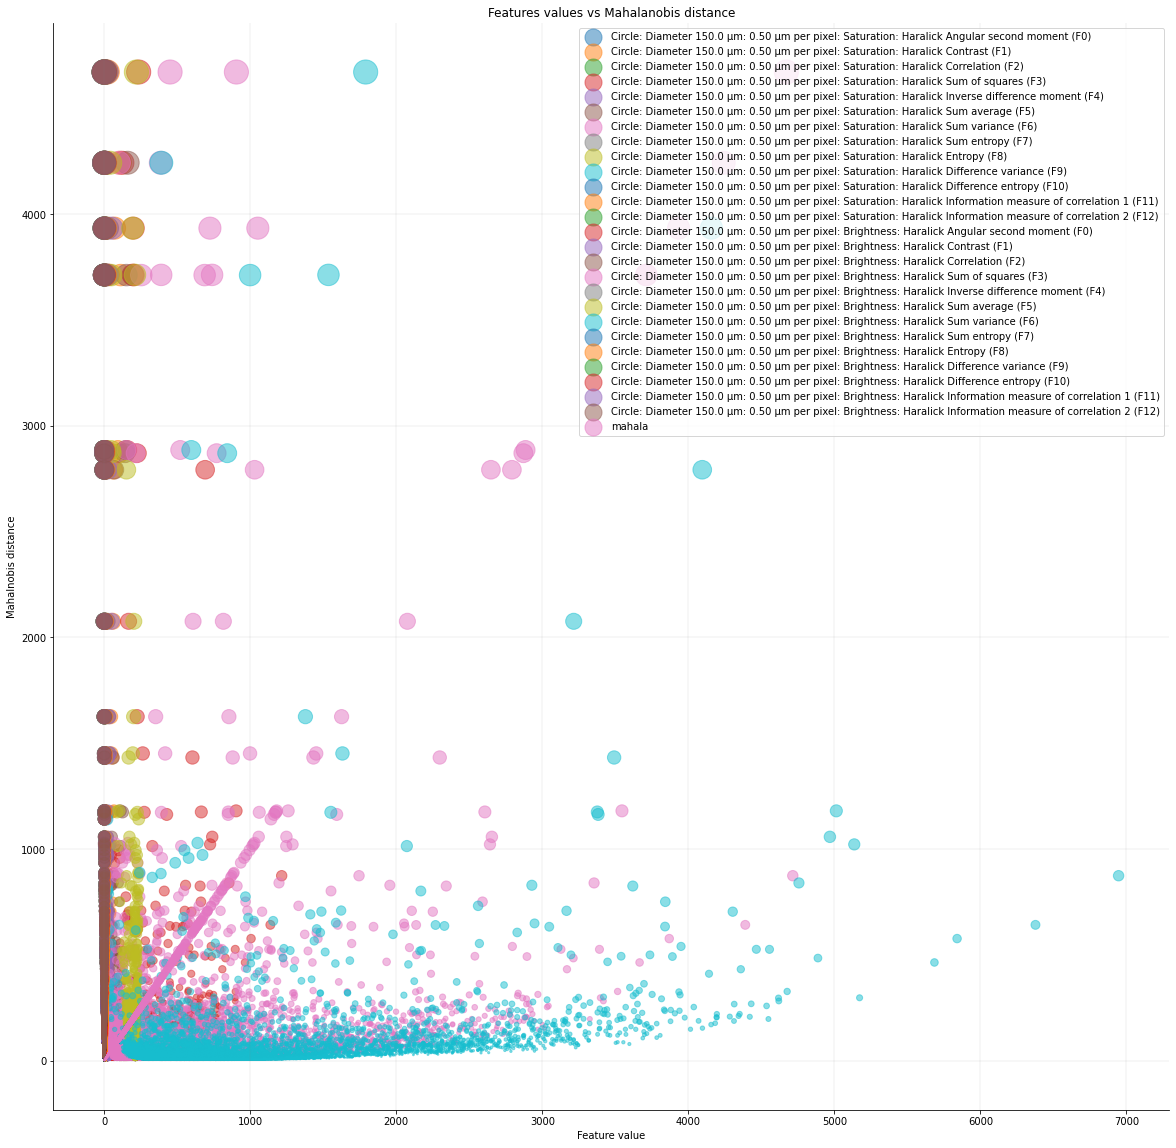

In [ ]:
# generate a scatter plot for visiualizing the feature correlations between every feature and the distance value.
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

n = len(group3.columns)
col_names = group3.columns
cmap = plt.cm.get_cmap("hsv", n+1)

for col_name in col_names:
  plt.scatter(group3.loc[:,col_name], 
            group3.iloc[:,-1],
            #c=[cmap(col_name)], # 
            marker='.',
            s=group3.iloc[:,-1]*0.5, # marker size is the Mahalanobis distance, 3rd dim, same as Y (scaled_df.iloc[:,-1]) in this case
            label=col_name,
            alpha=0.5);
plt.legend(loc='upper right');

# adds a title and axes labels
ax1.set_title('Features values vs Mahalanobis distance')
ax1.set_xlabel('Feature value')
ax1.set_ylabel('Mahalnobis distance')

# remove top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# adds major gridlines
ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.show()

### visualization with autoencoder network

This is WIP becasue the dataset does not have a label feature. 

In [ ]:
import keras as K 
import tensorflow as tf 
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2' # suppress CPU msg 

class MyLogger(K.callbacks.Callback): 
  def __init__(self, n): 
    self.n = n # print loss every n epochs 

  def on_epoch_end(self, epoch, logs={}):
     if epoch % self.n == 0: 
       curr_loss =logs.get('loss') 
       print("epoch = %4d loss = %0.6f" % (epoch, curr_loss))

def main(): 
  # 0. get started 
  print("\nBegin Haralick features dim reduction using an autoencoder")
  np.random.seed(1) 
  tf.random.set_seed(1)

  # 1. load data into memory 
  print("Loading data into memory \n") 
  
  data_x = scaled_df #np.loadtxt(data_file, delimiter=",", usecols=range(0,64), dtype=np.float32) 
  labels = len(group3.columns) #np.loadtxt(data_file, delimiter=",", usecols=[64], dtype=np.float32)
  #data_x = data_x / 16
  
  # 2. define autoencoder 
  my_init = K.initializers.glorot_uniform(seed=1)
  X = K.layers.Input(shape=[27]) 
  layer1 = K.layers.Dense(units=9, 
                          activation='sigmoid', 
                          kernel_initializer=my_init)(X) 
  layer2 = K.layers.Dense(units=3, 
                          activation='sigmoid', 
                          kernel_initializer=my_init)(layer1)
  layer3 = K.layers.Dense(units=9, 
                          activation='sigmoid', 
                          kernel_initializer=my_init)(layer2)
  layer4 = K.layers.Dense(units=27, 
                          activation='sigmoid', 
                          kernel_initializer=my_init)(layer3)

  enc_dec = K.models.Model(X, layer4) 
  encoder = K.models.Model(X, layer2) 
  
  # 3. compile model 
  simple_adam = K.optimizers.Adam() 
  enc_dec.compile(loss='mean_squared_error', optimizer=simple_adam)

  # 4. train model 
  print("Starting training") 
  max_epochs = 100 
  my_logger = MyLogger(n=100) 
  h = enc_dec.fit(x=data_x, y=data_x, batch_size=8, epochs=max_epochs, verbose=0, callbacks=[my_logger]) 
  print("Training complete \n") 
  
  # 5. generate (x,y) pairs for each digit 
  reduced = encoder.predict(data_x) 
  
  # 6. graph the digits in 2D 
  print("Displaying 64-dim data in 2D: \n") 
  plt.scatter(x=reduced[:, 0],
              y=reduced[:, 1], 
              c=labels, 
              edgecolors='none', 
              alpha=0.9, 
              cmap=plt.cm.get_cmap('nipy_spectral', 10), 
              s=20)
  
  plt.xlabel('component 1') 
  plt.ylabel('component 2') 
  plt.colorbar() 
  plt.show()

In [ ]:
main()

# Experiment 0

Some of the initial experiments.

[source](https://www.machinelearningplus.com/statistics/mahalanobis-distance/)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Student/VFU/BioMed/Haralick features/Haralick_Features_QuPath_measurements.tsv', sep='\t', header=0)
df.shape

(47737, 103)

In [ ]:
df = df[np.isfinite(df).all(1)]
df.shape

In [ ]:
df.head(5)

Mahalonobis distance is the distance between a point (vector, row in a dataset) and a distribution - not between two distinct points.

It is effectively a multivariate equivalent of the Euclidean distanc

In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:
df_x = df[['ROI: 0.50 µm per pixel: OD Sum: Haralick Angular second moment (F0)', 
           'ROI: 0.50 µm per pixel: OD Sum: Haralick Contrast (F1)',
           'ROI: 0.50 µm per pixel: OD Sum: Haralick Correlation (F2)',
           'ROI: 0.50 µm per pixel: OD Sum: Haralick Inverse difference moment (F4)',
           'ROI: 0.50 µm per pixel: OD Sum: Haralick Sum average (F5)',
           'ROI: 0.50 µm per pixel: OD Sum: Haralick Sum variance (F6)']].head(5)

In [ ]:
df_x.head()

,ROI: 0.50 µm per pixel: OD Sum: Haralick Angular second moment (F0),ROI: 0.50 µm per pixel: OD Sum: Haralick Contrast (F1),ROI: 0.50 µm per pixel: OD Sum: Haralick Correlation (F2),ROI: 0.50 µm per pixel: OD Sum: Haralick Inverse difference moment (F4),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum average (F5),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum variance (F6)
0,0.1701,5.3258,0.7762,0.7467,7.3809,42.0846
1,0.1679,1.2372,0.7904,0.7696,6.2214,10.6626
2,0.1192,12.3818,0.9694,0.6908,13.1604,795.3381
3,0.1497,8.6363,0.9616,0.7412,9.6104,440.4872
4,0.1638,2.2634,0.8464,0.7804,5.9119,27.3541


In [ ]:
df_x['mahala'] = mahalanobis(x=df_x, data=df_x)
df_x.head()

,ROI: 0.50 µm per pixel: OD Sum: Haralick Angular second moment (F0),ROI: 0.50 µm per pixel: OD Sum: Haralick Contrast (F1),ROI: 0.50 µm per pixel: OD Sum: Haralick Correlation (F2),ROI: 0.50 µm per pixel: OD Sum: Haralick Inverse difference moment (F4),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum average (F5),ROI: 0.50 µm per pixel: OD Sum: Haralick Sum variance (F6),mahala
0,0.1701,5.3258,0.7762,0.7467,7.3809,42.0846,4.165960
1,0.1679,1.2372,0.7904,0.7696,6.2214,10.6626,4.779194
2,0.1192,12.3818,0.9694,0.6908,13.1604,795.3381,9.453796
3,0.1497,8.6363,0.9616,0.7412,9.6104,440.4872,3.755701
4,0.1638,2.2634,0.8464,0.7804,5.9119,27.3541,4.681653
